# Capítulo 4. Modelos de Entrenamiento

## Modelos de Entrenamiento — Qué son y para qué sirven

---

## 1. Regresión Lineal
**Qué es:**  
Un modelo que busca una relación lineal entre variables predictoras y una variable objetivo.

**Para qué sirve:**  
- Predecir valores numéricos continuos.
- Modelar relaciones simples entre variables.

---

### 1.1 Ecuación Normal
**Qué es:**  
Una fórmula cerrada que calcula directamente los parámetros óptimos sin iteraciones.

**Para qué sirve:**  
- Entrenar regresión lineal de manera exacta.
- Funciona bien con datasets pequeños o medianos.

---

### 1.2 Regresor Lineal de Scikit-Learn
**Qué es:**  
La implementación en scikit-learn del modelo de regresión lineal.

**Para qué sirve:**  
- Entrenar modelos lineales fácilmente.
- Integrarse con validación, métricas y pipelines.

---

## 2. Descenso del Gradiente
**Qué es:**  
Un método iterativo para optimizar parámetros reduciendo el error paso a paso.

**Para qué sirve:**  
- Entrenar modelos cuando no existe solución cerrada.
- Escalar a grandes volúmenes de datos.

---

### 2.1 Descenso del Gradiente por Lote (Batch GD)
**Qué es:**  
Actualiza los parámetros usando todo el dataset en cada iteración.

**Para qué sirve:**  
- Obtener actualizaciones precisas y estables.

---

### 2.2 Descenso del Gradiente Estocástico (SGD)
**Qué es:**  
Actualiza los parámetros usando una sola muestra en cada iteración.

**Para qué sirve:**  
- Entrenar rápidamente con datos grandes.
- Explorar mejor el espacio de soluciones (aunque con más ruido).

---

## 3. Regresión Polinomial
**Qué es:**  
Extiende la regresión lineal agregando términos polinomiales para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar curvas y patrones complejos.
- Ajustar relaciones no lineales entre variables.

---

## 4. Curvas de Aprendizaje
**Qué es:**  
Gráficos que muestran el rendimiento del modelo en función del número de ejemplos o iteraciones.

**Para qué sirve:**  
- Diagnosticar sobreajuste (overfitting) y subajuste (underfitting).
- Decidir si se necesita más datos o un modelo más complejo.

---

## 5. Regularización de Modelos Lineales
**Qué es:**  
Métodos que penalizan parámetros grandes para evitar sobreajuste.

**Para qué sirve:**  
- Mejorar la capacidad de generalización.
- Controlar la complejidad del modelo.

---

### 5.1 Ridge (Regularización L2)
**Qué es:**  
Penalización basada en el cuadrado de los coeficientes.

**Para qué sirve:**  
- Reducir sobreajuste manteniendo coeficientes pequeños.
- Funciona bien con variables correlacionadas.

---

### 5.2 Lasso (Regularización L1)
**Qué es:**  
Penalización basada en la suma de los valores absolutos de los coeficientes.

**Para qué sirve:**  
- Realizar selección de características (coeficientes se vuelven cero).
- Simplificar modelos automáticamente.

---

### 5.3 Elastic Net
**Qué es:**  
Combinación de las penalizaciones L1 y L2.

**Para qué sirve:**  
- Aprovechar beneficios de Ridge y Lasso.
- Manejar datasets con variables muy correlacionadas.

---

## 6. Regresión Logística
**Qué es:**  
Modelo lineal que utiliza la función sigmoide para estimar probabilidades.

**Para qué sirve:**  
- Resolver problemas de clasificación binaria.
- Interpretar resultados como probabilidades.

---

## 7. Regresión Softmax
**Qué es:**  
Extensión de la regresión logística para múltiples clases.

**Para qué sirve:**  
- Clasificación multiclase.
- Modelos donde las clases son mutuamente excluyentes.


## <span style="color:green">1. Regresión Lineal</span>

#### <span style="color:blue"> 1.1 Ecuación Normal </span>

In [2]:
# Importar las librerías, numpy, matplotlib, pandas
# numpy es la bibleoteca por exelencia de matemáticas para python
import numpy as np
import pandas as pd
#Importar matplotlib porque vamos a estar haciendo gráficas
import matplotlib.pyplot as plt


In [3]:
#Generar el set de jueguete de datos lineales aleatorios 
set_num = np.random.rand(100,1)

# Genera vector de valores que vas a estar prediciendo (añade un factor de aleatoriedad)
# (con la formula de lo del modelo de regresion de los apuntes )
vector = 2 + 2 * set_num + np.random.rand(100,1)

In [58]:
set_num.shape

(100, 1)

In [57]:
vector.shape

(100, 1)

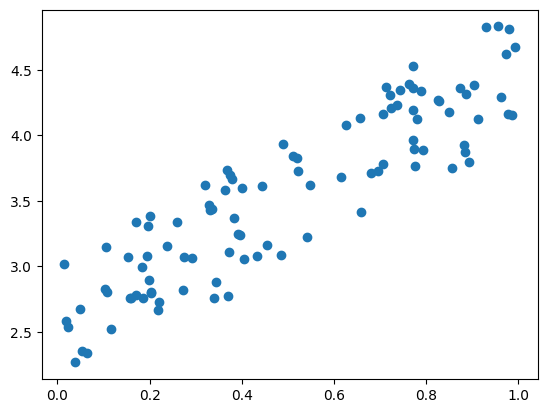

In [5]:
#Gráfica los datos del set de juguete 
plt.scatter(set_num,vector)
plt.show()

In [6]:
#Agregar el valor de x0
sig_set = np.c_[np.ones((100,1)),set_num]

#Aplicar la ecuación normal 
ec_normal = np.linalg.inv(sig_set.T.dot(sig_set)).dot(sig_set.T).dot(vector)
#Visualiza  
ec_normal

array([[2.57126614],
       [1.96738242]])

👀: Aquí no tendrán los mismos datos que yo, es normal por los factores de aleatoriedad

📝:El primer valor de la matriz es la pendiente y el segundo es la intersección 

In [60]:
#Prueba estes datos con un vector de prueba
set_prueba = np.array([[0],[1]])

In [61]:
#Agregar X0=1
set_prueba_2 = np.c_[np.ones((2,1)),set_prueba]

In [62]:
#Hacer las predicciones con la ecuación normal
predicciones = set_prueba_2.dot(ec_normal)
predicciones


array([[2.57126614],
       [4.53864856]])

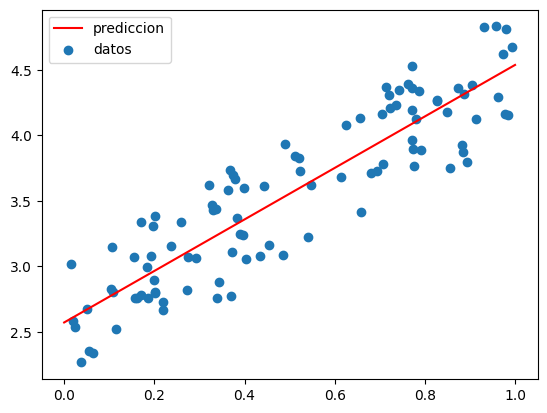

In [68]:
# Grafica la regresión con los datos originales y la predicción
plt.plot(set_prueba, predicciones, label='prediccion', color='r')
plt.scatter(set_num, vector, label='datos')
plt.legend()
plt.show()

#### <span style="color:blue"> 1.2 Regresor Linear de Scikit </span>

In [69]:
#Haz la regresión con scikit 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(set_num,vector)

#Cálcula la intersección y la pendiente con este método
reg.intercept_, reg.coef_

(array([2.57126614]), array([[1.96738242]]))

Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo que implica cada método a tu ordenador. 

***

## <span style="color:green">2. Descenso del Gradiente</span>

Algoritmo de optimización. Signfica una alternativa a la ecuación normal

#### <span style="color:blue"> 2.1 Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo** 

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [70]:
# Definir la tasa de aprendizaje (ra=(valor que queramos darle))
ra = 0.1
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos 
m = len(set_num)
#Incializa la pendiente 
b0 = np.random.rand(2,1)

In [71]:
#Hacer el programa para el descenso del gradiente
for iter in range(iteraciones):

    #Expresión a manera de álgebra lineal de los mínimos cuadrados (función de costo)
    gradiente = 2/m * sig_set.T.dot(sig_set.dot(b0) - vector)
    b0 = b0 - ra * gradiente
b0

array([[2.57126647],
       [1.96738182]])

Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación !!!

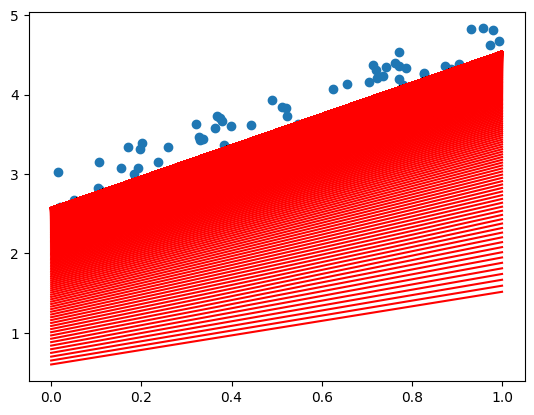

array([[-0.00013514],
       [ 0.00025118]])

In [76]:
#Repetir el ejercicio pero con ritmo de tasa de aprendizaje diferente 
ra2 = 0.01
iteraciones2 = 1000
m2 = len(set_num)
b1 = np.random.rand(2,1)

plt.scatter(set_num,vector,label='datos')

#Visualiza los modelos que va proponiendo hasta llegar a la predicción final 
for iter in range(iteraciones2):
    gradiente1 = 2/m2 * sig_set.T.dot(sig_set.dot(b1) - vector)
    b1 = b1 - ra2 * gradiente1
    y_new = set_prueba_2.dot(b1)
    plt.plot(set_prueba, y_new,"r-")
plt.show()
gradiente1



**Ejercicio Extra**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch 

***

#### <span style="color:blue"> 2.2 Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales. 
**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [77]:
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente 
epochs = 100
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
lt0,lt1 = 10,100
pendiente = 100
#Definir el horario de aprendizaje
def learning_schedule(t):
    return lt0 / (t + lt1)
#Definir los 2 valores con lo que van a empezar
b0 = np.random.rand(2,1)

#Definir la función 
for iter in range(epochs):
    for i in range(pendiente):
        #Genera un índice aleatorio
        randindex = np.random.randint(pendiente)
        #Valor x de la coordenada que seleccionamos al azar
        xcoor = sig_set[randindex:randindex+1]
        #Valor y de la coordenada que seleccionamos al azar
        ycoor = vector[randindex:randindex+1]
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradiente1 = 2 * xcoor.T.dot(xcoor.dot(b0) - ycoor)
        #Calcular el ritmo de aprendizaje
        ra = learning_schedule(iter * pendiente + i)
        #Calcular los parámetros de intersección y pendiente 
        b0 = b0 - ra * gradiente1
b0

array([[2.5898709 ],
       [1.98182593]])

Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

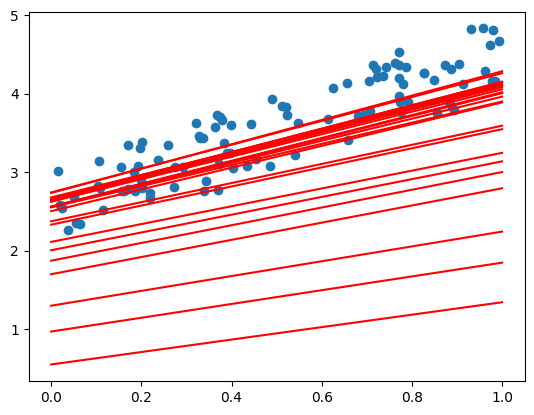

In [78]:
# #Repetir el ejercicio pero desplegando cada gradiente realizado 
epchos = 5
tl, lt1 = 10,100
pendiente = 5

def learning_schedule(t):
    return tl / (t + lt1)
b0 = np.random.rand(2,1)
#Agrega un scatterplot para ver los datos 
plt.scatter(set_num,vector,label='datos')

for iter in range(epchos):
        for i in range(pendiente):
                #Selecciona un índice al azar
                randindex = np.random.randint(pendiente)
                xcoor = sig_set[randindex:randindex+1]
                ycoor = vector[randindex:randindex+1]
                y_new = set_prueba_2.dot(b0)
                #Grafica las líneas rojas que simbolizan los diferentes gradientes a través de las iteraciones. 
                plt.plot(set_prueba, y_new,"r-")
                gradiente1 = 2 * xcoor.T.dot(xcoor.dot(b0) - ycoor)
                ra = learning_schedule(iter * pendiente + i)
                b0 = b0 - ra * gradiente1
plt.show()

In [79]:
#Hacerlo con scikit 
from sklearn.linear_model import SGDRegressor
#La toleración es el límite menor al valor de la suma de los errores al cuadrado 
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#.ravel: te genera una lista normal 
sgd.fit(set_num,vector.ravel())
#Sacar los parámetros, la intersección y la pendiente 
sgd.intercept_, sgd.coef_

(array([2.65149045]), array([1.86961801]))

In [18]:
#Visualiza la lista normal que genera .ravel


👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">3. Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

In [19]:
#Generar set de datos de juguete. Añade un toque de aleatoriedad

#Elevar la ecuación al 2

#Gráfica el set de datos 


No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada. 

In [20]:
#Importar PolynomialFeatures con una potencia 2

In [21]:
#Hacer una regresión lineal sobre de los datos 


Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

In [22]:
#Graficar la predicción de PolynomialFeatures y los datos originales

#escribir la fórmula a partir del array de arriba 


**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

***

## <span style="color:green">4. Curvas de Aprendizaje</span>

In [23]:
#Importar mean_squared_error train_test_split para medir el error sobre los datos de entranamiento y validación




    #Empezamos dividiendo los datos en datos de entrenamiento y validación 

    #Generar una lista vacías para irlas rellenando conforme se vaya calculando los errores 

    #Tomar el set de entrenamiento y ajustándolo al modelo pero solo con un dato de entrenamiento y así sucesivamente 
   
        #predecir el modelo 

        #predecir el modelo

        #Calcular los errores


        
        #graficarlos
    

In [24]:
#Correr la curva de aprendizaje


In [25]:
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal 


In [26]:
#Ejecutar curvas de aprendizaje a regresion_polinomial 


In [27]:
#Variar el grado del polinomio para mejorar el rendimiento del modelo. Ejemplo:2


In [28]:
#Correr la curva de aprendizaje


Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green">5. Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

In [29]:
#Hacer un set de juguete 


In [30]:
#Hacer una regresión lineal sencilla para comparar con la regresión de cresta


In [31]:
#Generar 100 datos para graficar la linea de predicción  


In [32]:
#graficar 


In [33]:
#Importar Ridge para hacer nuestra regresión de cresta 


In [34]:
#Calcula los parámetros de ridge


In [35]:
#Hacer la linea de la predicción de Ridge


In [36]:
#graficar comparando la regresión lineal y de Ridge


***

### <span style="color:blue">5.2 Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [37]:
#Importar lasso

#Asignar una alpha de 0.1


In [38]:
#Calcular los parámetros de intersección y coeficientes de x 


In [39]:
#Hacer la linea de la predicción de lasso


In [40]:
#graficar comparando la regresión lineal, de Ridge y de Lasso


***

### <span style="color:blue">5.3 Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [41]:
#Importar ElasticNet


In [42]:
#Calcular los parámetros de intersección y coeficientes de x 


In [43]:
#Hacer la linea de la predicción de Red Elástica


In [44]:
#graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica


***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

In [45]:
#Traer el set de datos
#candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
 #             'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
  #            'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
   #           'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
#Visualizar el set de datos 


IndentationError: unexpected indent (1163543574.py, line 6)

**KEY:** 
gmat: prueba de coeficiente intelectual
gpa: es tu promedio en la escuela

In [ ]:
#Dividir el set de datos en en las variables predichas y la variable a predecir 


In [ ]:
#importar LogisticRegression


In [ ]:
#Hacer las predicciones 


In [ ]:
#Visualiza y_pred


In [ ]:
#Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido 


In [ ]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no 


In [ ]:
#Incluir estas listas en nuestro dataframe


In [ ]:
#Visualizar el peso de la experiencia laboral, de gmat y de gpa


In [ ]:
#Evaluar la regresión con métricas como la matriz de confusión


In [ ]:
#Evaluar la regresión con métricas como f1_score


## <span style="color:green">6. Regresión Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [ ]:
#Importar LogisticRegression
